# W=3 плоская

In [4]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
Nups, Ndowns, Es, Ls = [], [], [], []
with open('W3_trimers.txt') as f:
    for line in f:
        Nups.append(int(re.search(r'(?<=Nup= )\d+',line).group()))
        Ndowns.append(int(re.search(r'(?<=Ndown= )\d+',line).group()))
        Es.append(float(re.search(r'(?<=E = ).+',line).group()))
        

In [47]:
df_W3 = pd.DataFrame({'Nup' : Nups, 
              'Ndown': Ndowns,
              'E' : Es,
              'L' : sorted([50,60,70,80,90,100,150,200,250,300]*3)})

In [9]:
def aggr(x):
    return 2*min(x) - sum(x)


In [49]:
df_W3['1/L'] = 1/df_W3['L']

In [7]:
def approx(dataframe):
    """
    Подгоняем параболой
    """
    fitted = dataframe[['1/L', 'E']].groupby('1/L').agg(aggr).reset_index()
    x= fitted['1/L']
    y= fitted['E']
    coeffs = np.polyfit(x,y,2)
    return x, y, coeffs

def drawer(x,y,coeffs, name, color):
    plt.plot(x,y,'o',c = color, label = name)
    plt.plot(np.arange(0,0.026,0.00125), 
             list(map(lambda x: coeffs[0]*x**2 + coeffs[1]*x + coeffs[2], np.arange(0,0.026,0.00125))), 
             '-',
             c = color)
    plt.legend()

<IPython.core.display.Javascript object>


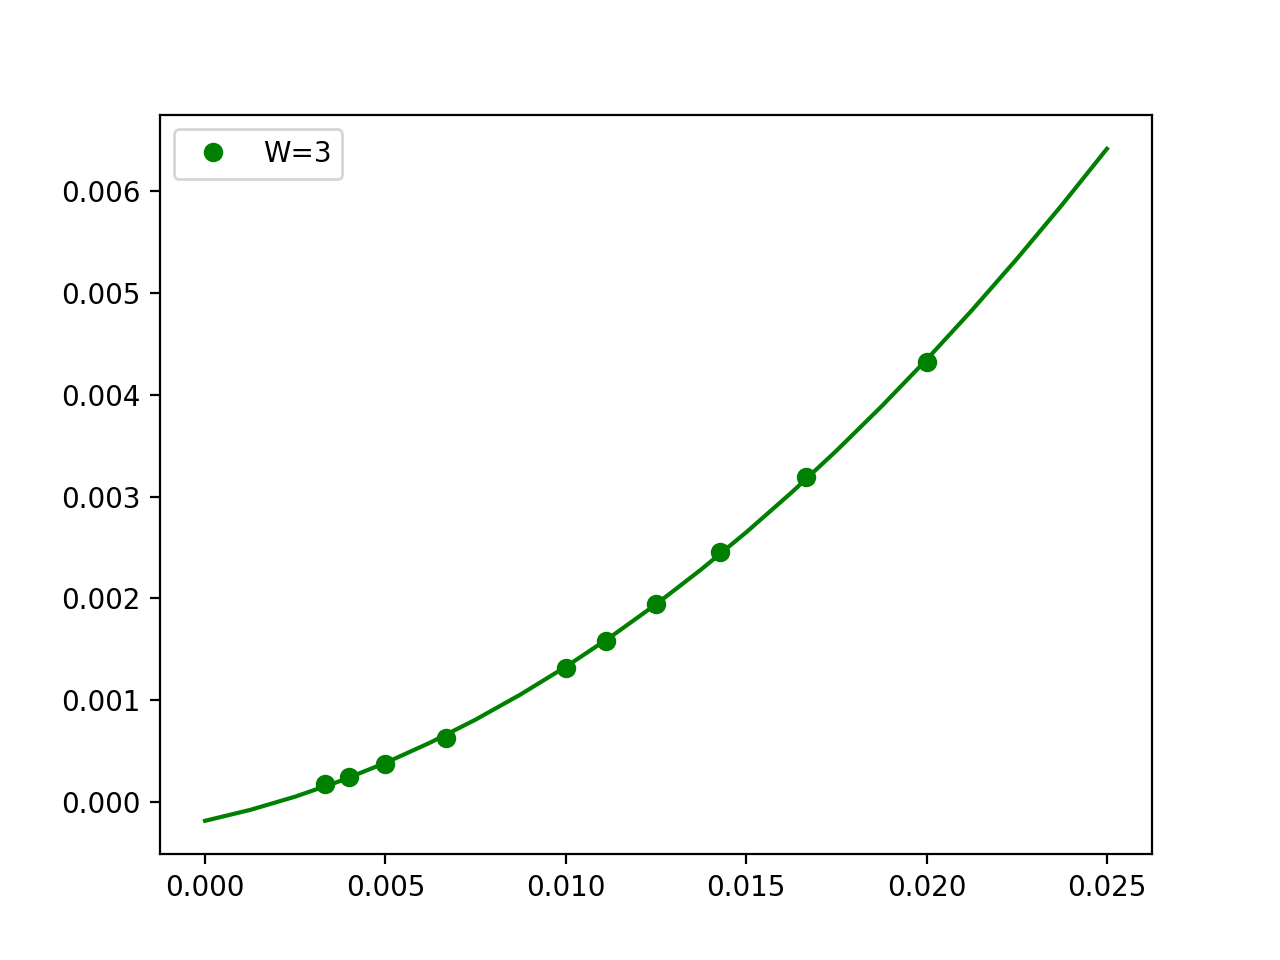

In [68]:
%matplotlib notebook
x, y, coeffs = approx(df_W3)
drawer(x, y, coeffs, 'W=3', 'green')

In [52]:
coeffs

array([ 7.50622012e+00,  7.61316685e-02, -1.81843407e-04])

# W = 3 тоблерон

In [9]:
def load_df(path):
    Nups, Ndowns, Es, Ls = [], [], [], []
    with open(path) as f:
        for line in f:
            Nups.append(int(re.search(r'(?<=Nup= )\d+',line).group()))
            Ndowns.append(int(re.search(r'(?<=Ndown= )\d+',line).group()))
            Es.append(float(re.search(r'(?<=E = ).+',line).group()))
            Ls.append(float(re.search(r'(?<=L = )\d+',line).group()))
    df = pd.DataFrame({'Nup' : Nups, 
                       'Ndown': Ndowns,
                       'E' : Es,
                       'L' : Ls})
    df['1/L'] = 1/df['L']
    
    return df

        

<IPython.core.display.Javascript object>


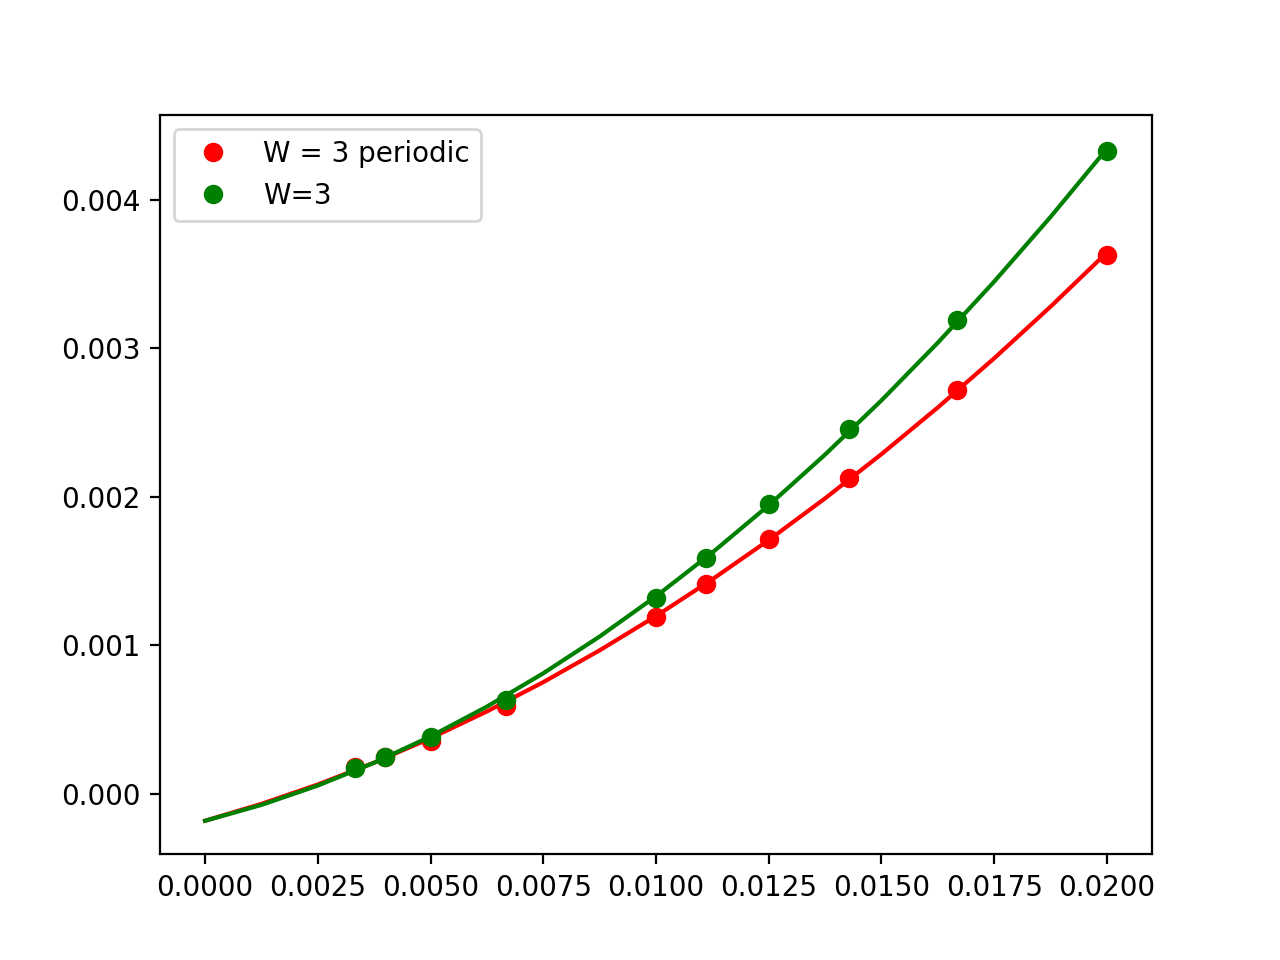

In [10]:
%matplotlib notebook
df_toblerone = load_df('W3_trimers_toblerone.txt')
x, y, coeffs = approx(df_toblerone)
drawer(x, y, coeffs, 'W = 3 periodic', 'red')
x, y, coeffs = approx(df_W3)
drawer(x, y, coeffs, 'W=3', 'green')

# W = 4

<IPython.core.display.Javascript object>


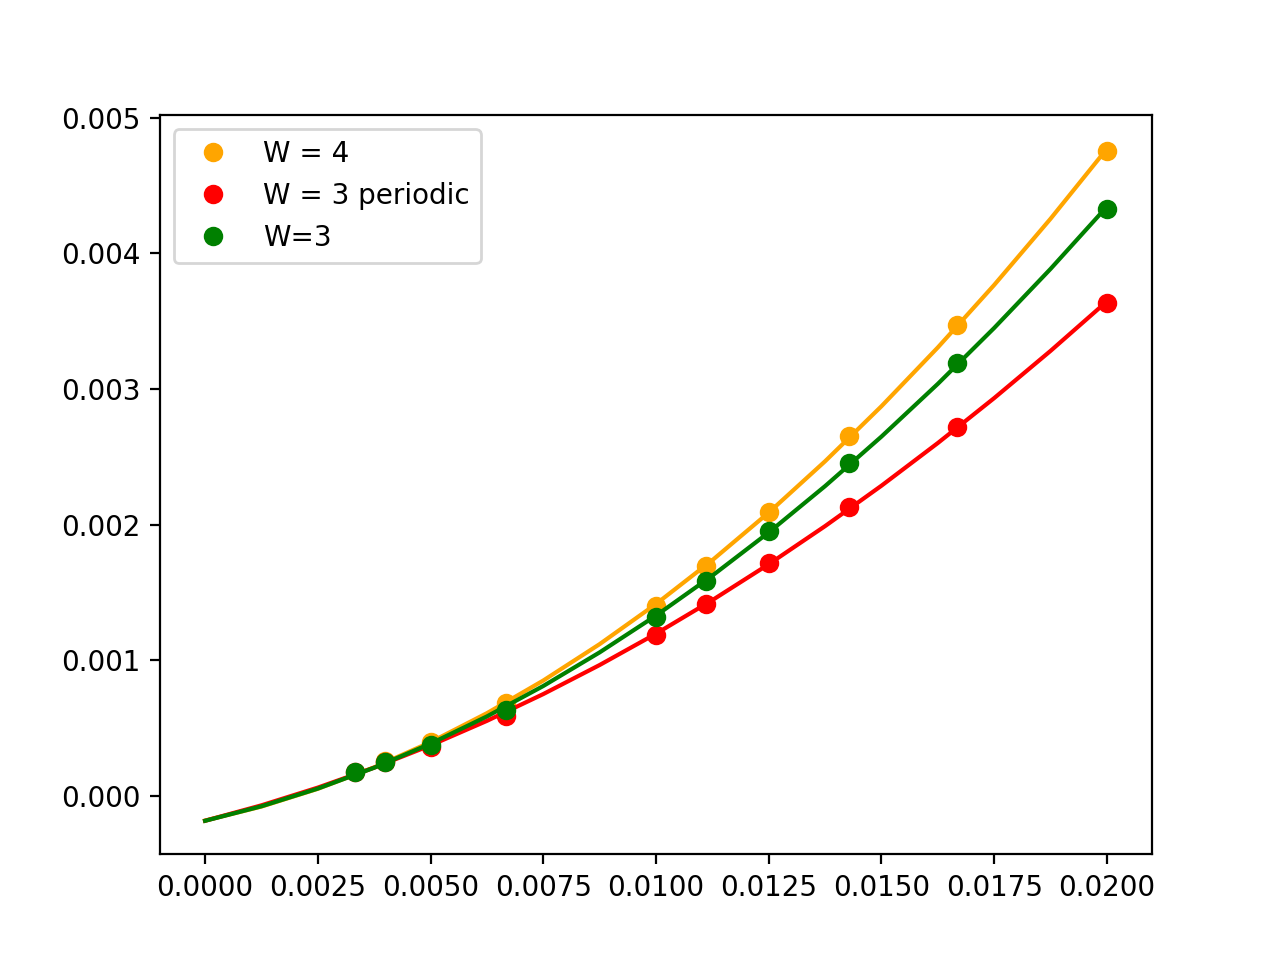

In [11]:
%matplotlib notebook
df_W4 = load_df('W4_trimers.txt')
x, y, coeffs = approx(df_W4)
drawer(x, y, coeffs, 'W = 4', 'orange')
x, y, coeffs = approx(df_toblerone)
drawer(x, y, coeffs, 'W = 3 periodic', 'red')
x, y, coeffs = approx(df_W3)
drawer(x, y, coeffs, 'W=3', 'green')

# W = 4 периодические условия

<IPython.core.display.Javascript object>


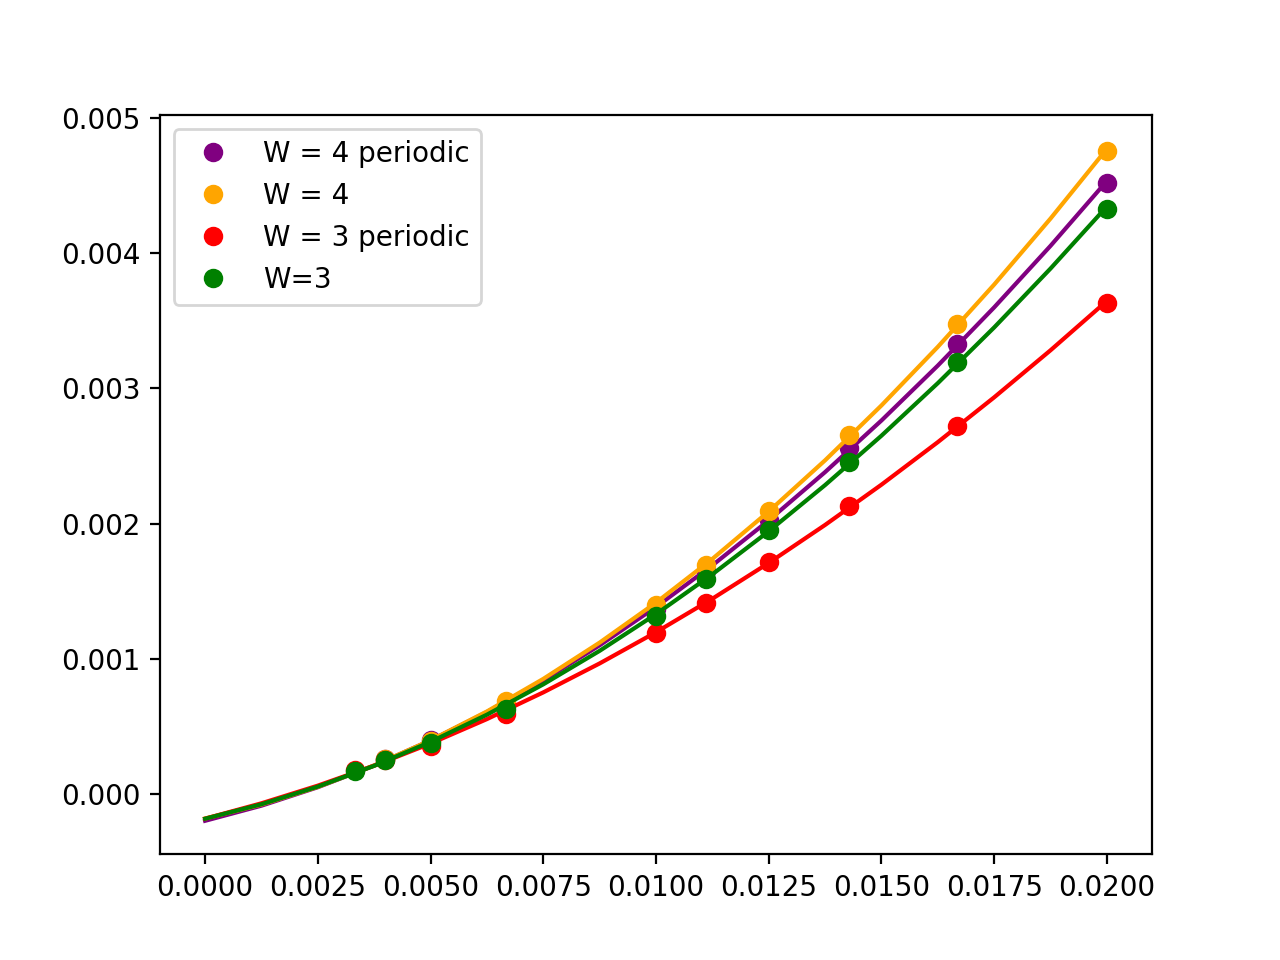

In [12]:
%matplotlib notebook
df_W4_periodic = load_df('W4_trimers_periodic.txt')
x, y, coeffs = approx(df_W4_periodic)
drawer(x, y, coeffs, 'W = 4 periodic', 'purple')
x, y, coeffs = approx(df_W4)
drawer(x, y, coeffs, 'W = 4', 'orange')
x, y, coeffs = approx(df_toblerone)
drawer(x, y, coeffs, 'W = 3 periodic', 'red')
x, y, coeffs = approx(df_W3)
drawer(x, y, coeffs, 'W=3', 'green')

# W = 5 

In [13]:
df_W5 = load_df('W5_trimers.txt')
df_W5 = df_W5.sort_values(by=['L','Nup','Ndown'], ascending = [True, False, False])
df_W5

,Nup,Ndown,E,L,1/L
0,2,1,-12.996971,50.0,0.020000
1,1,1,-9.273803,50.0,0.020000
2,1,0,-3.728257,50.0,0.020000
3,2,1,-12.999884,60.0,0.016667
4,1,1,-9.274172,60.0,0.016667
5,1,0,-3.729399,60.0,0.016667
6,2,1,-13.001691,70.0,0.014286
7,1,1,-9.274395,70.0,0.014286
8,1,0,-3.730093,70.0,0.014286
9,2,1,-13.002891,80.0,0.012500


<IPython.core.display.Javascript object>


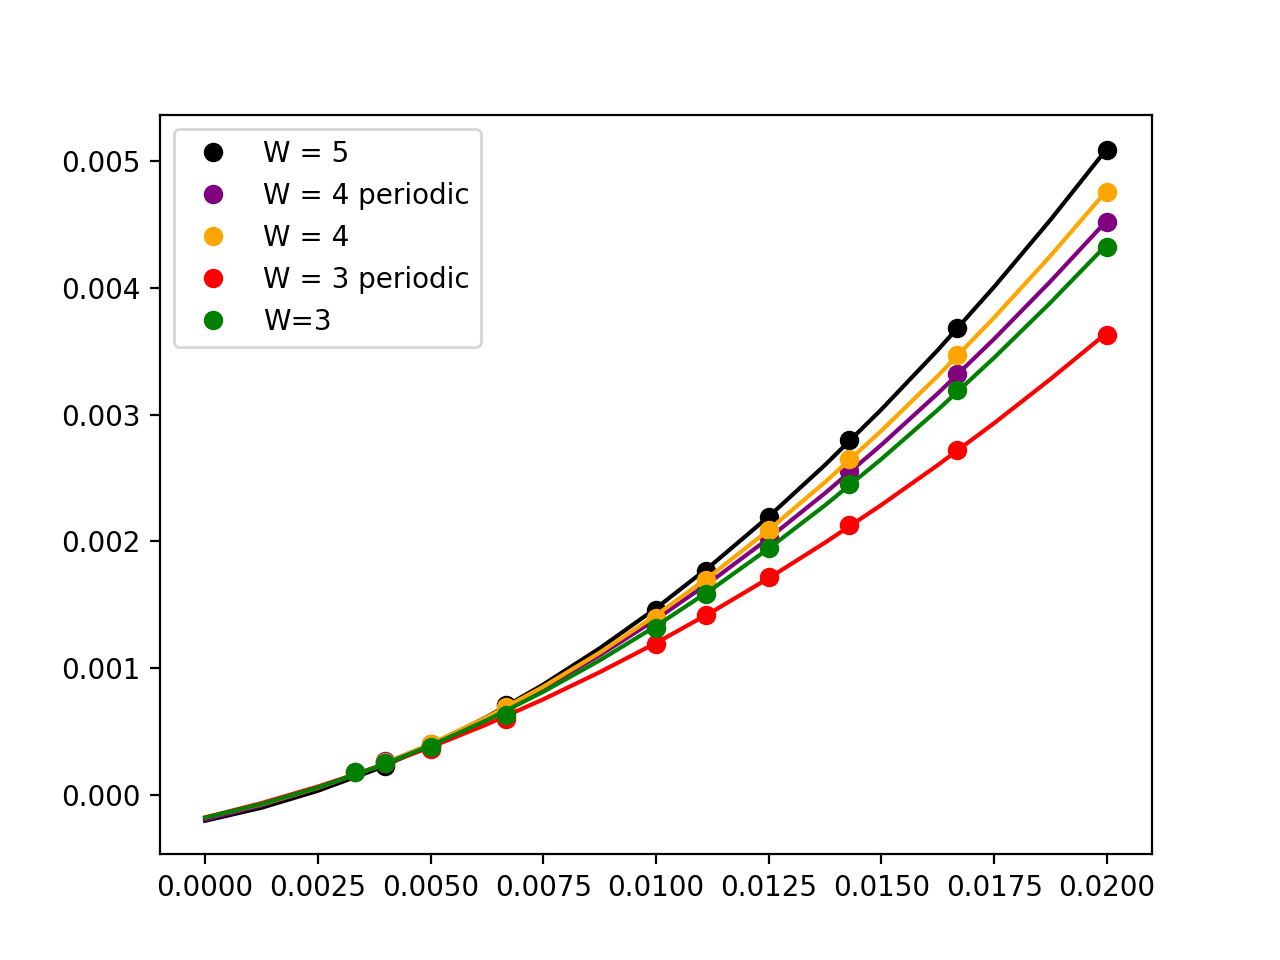

In [14]:
%matplotlib notebook
df_W5 = load_df('W5_trimers.txt')
df_W5 = df_W5.sort_values(by=['L','Nup','Ndown'], ascending = [True, False, False])
x, y, coeffs = approx(df_W5)
drawer(x, y, coeffs, 'W = 5', 'black')
x, y, coeffs = approx(df_W4_periodic)
drawer(x, y, coeffs, 'W = 4 periodic', 'purple')
x, y, coeffs = approx(df_W4)
drawer(x, y, coeffs, 'W = 4', 'orange')
x, y, coeffs = approx(df_toblerone)
drawer(x, y, coeffs, 'W = 3 periodic', 'red')
x, y, coeffs = approx(df_W3)
drawer(x, y, coeffs, 'W=3', 'green')

# different t_s

In [12]:
files_list = sorted([i for i in os.listdir() if len(i)==len('W4_05_trimers.txt')])
files_list

['W1_03_trimers.txt',
 'W1_05_trimers.txt',
 'W1_07_trimers.txt',
 'W2_03_trimers.txt',
 'W2_05_trimers.txt',
 'W2_07_trimers.txt',
 'W3_03_trimers.txt',
 'W3_05_trimers.txt',
 'W3_07_trimers.txt',
 'W4_03_trimers.txt',
 'W4_05_trimers.txt',
 'W4_07_trimers.txt',
 'W5_03_trimers.txt',
 'W5_05_trimers.txt',
 'W5_07_trimers.txt']

In [2]:
# first argument - path to trimers energy file
# second argument - 2 lightweight one heavyweight OR 2 heavyweight one lightweight
def get_df(path, lightweight = False):
    Nups, Ndowns, Es, Ls = [], [], [], []
    with open(path) as f:
        for line in f:
            Nups.append(int(re.search(r'(?<=Nup =)\d+',line).group()))
            Ndowns.append(int(re.search(r'(?<=Ndown = )\d+',line).group()))
            Ls.append(int(re.search(r'(?<=L=)\d+',line).group()))
            Es.append(float(re.search(r'(?<=E = )[^ ]+',line).group()))
    df = pd.DataFrame({'Nup' : Nups, 
                       'Ndown': Ndowns,
                       'E' : Es,
                       'L' : Ls})
    df['1/L'] = 1/df['L']
    if not lightweight:
        return df[(~((df.Nup == 2) & (df.Ndown == 1))) & (~((df.Nup == 1) & (df.Ndown == 0)))]
    else: 
        return df[(~((df.Nup == 1) & (df.Ndown == 2))) & (~((df.Nup == 0) & (df.Ndown == 1)))]
    

In [5]:
# df03 = get_df('W5_03_trimers.txt', False)
# df05 = get_df('W5_05_trimers.txt', False)
df = get_df('W1_05_trimers.txt', lightweight = True)

<IPython.core.display.Javascript object>


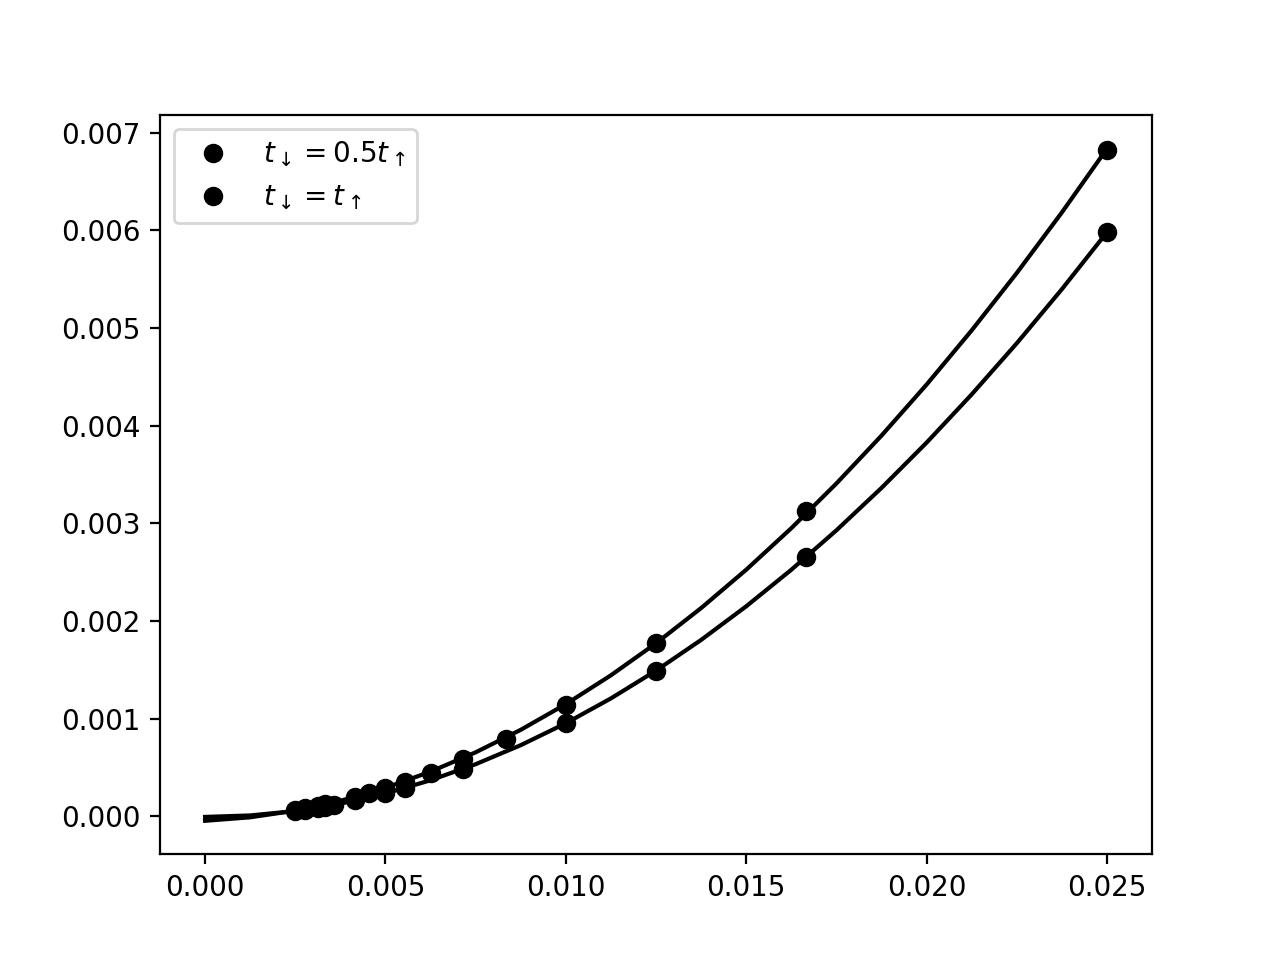

array([ 1.03858150e+01,  1.55857834e-02, -4.44144335e-05])

In [11]:
%matplotlib notebook
# x, y, coeffs = approx(df03.query('1/L <= 0.01'))
# drawer(x, y, coeffs, 'W=5, t_down = 0.3*t_up', 'green')
# x, y, coeffs = approx(df05.query('1/L <= 0.01'))
# drawer(x, y, coeffs, 'W=5, t_down = 0.5*t_up', 'red')
x, y, coeffs = approx(df.query('1/L <= 0.05'))
drawer(x, y, coeffs, r'$t_{\downarrow} = 0.5t_{\uparrow}$', 'black')
coeffs

In [ ]:
Энергия связи (отношение масс)

Графики для разного числа ног

# Trimer energy vs W

In [15]:
masses = '03'

def get_files(files_list, masses):
    return sorted([i for i in files_list if masses in i])

get_files(files_list, masses)

['W1_03_trimers.txt',
 'W2_03_trimers.txt',
 'W3_03_trimers.txt',
 'W4_03_trimers.txt',
 'W5_03_trimers.txt']

In [35]:
def get_w_dependence(files_list: list, 
                     masses: str, 
                     lightweight: bool) -> (list, list):
    Ws = []
    trimer_energies = []

    for file in get_files(files_list, masses):
        df = get_df(file, lightweight)
        x, y, coeffs = approx(df.query('1/L <= 0.05'))
        trimer_energies.append(coeffs[-1])
        Ws.append(int(file[1]))
    return Ws, trimer_energies

In [53]:
print(*get_w_dependence(files_list, '07', True))

[1, 2, 3, 4, 5] [-0.00011512354851492523, -8.95668587358855e-05, -0.00010032682069719065, -0.0001127659055024222, -0.00013776850311332186]


In [54]:
print(*get_w_dependence(files_list, '05', True))

[1, 2, 3, 4, 5] [-4.441443354879405e-05, -3.769019563990704e-05, -4.8957905199677956e-05, -3.927611439230997e-05, -4.745450713618076e-05]


# Two light - one heavy

Trimer energy is of 10^-5 order which is zero for ~10 point approximation

<IPython.core.display.Javascript object>


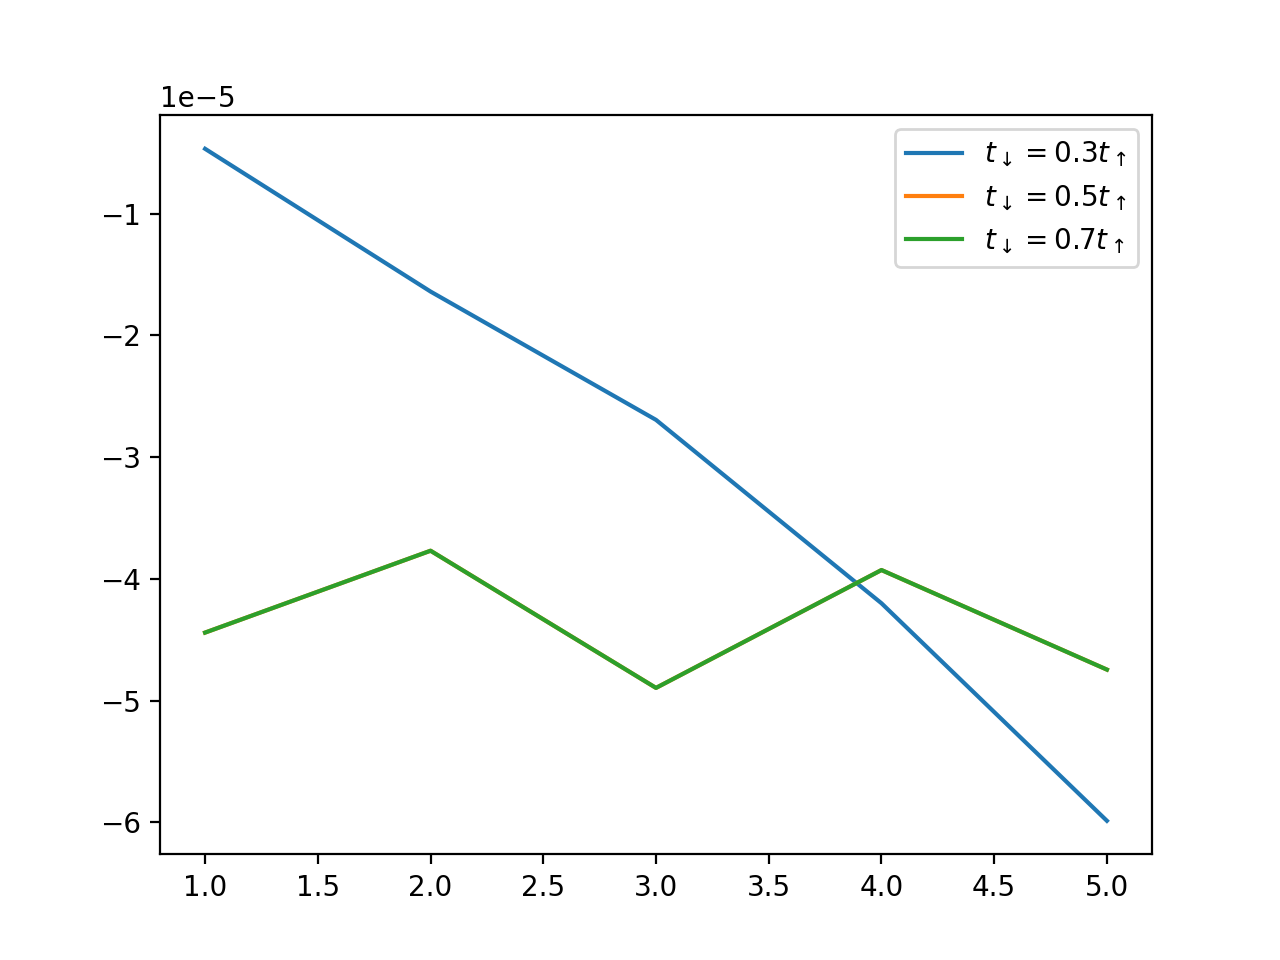

In [61]:
plt.plot(*get_w_dependence(files_list, 
                           masses = '03', 
                           lightweight = True
                          ),
        label = r'$t_{\downarrow} = 0.3t_{\uparrow}$')

plt.plot(*get_w_dependence(files_list, 
                           masses = '05', 
                           lightweight = True
                          ),
        label = r'$t_{\downarrow} = 0.5t_{\uparrow}$')
plt.plot(*get_w_dependence(files_list, 
                           masses = '05', 
                           lightweight = True
                          ),
        label = r'$t_{\downarrow} = 0.7t_{\uparrow}$')

plt.legend()

# Two heavy - one light

Trimer energy is nonzero (of 10^-2 - 10^-1), which is significant even for ~10 point approximation

<IPython.core.display.Javascript object>


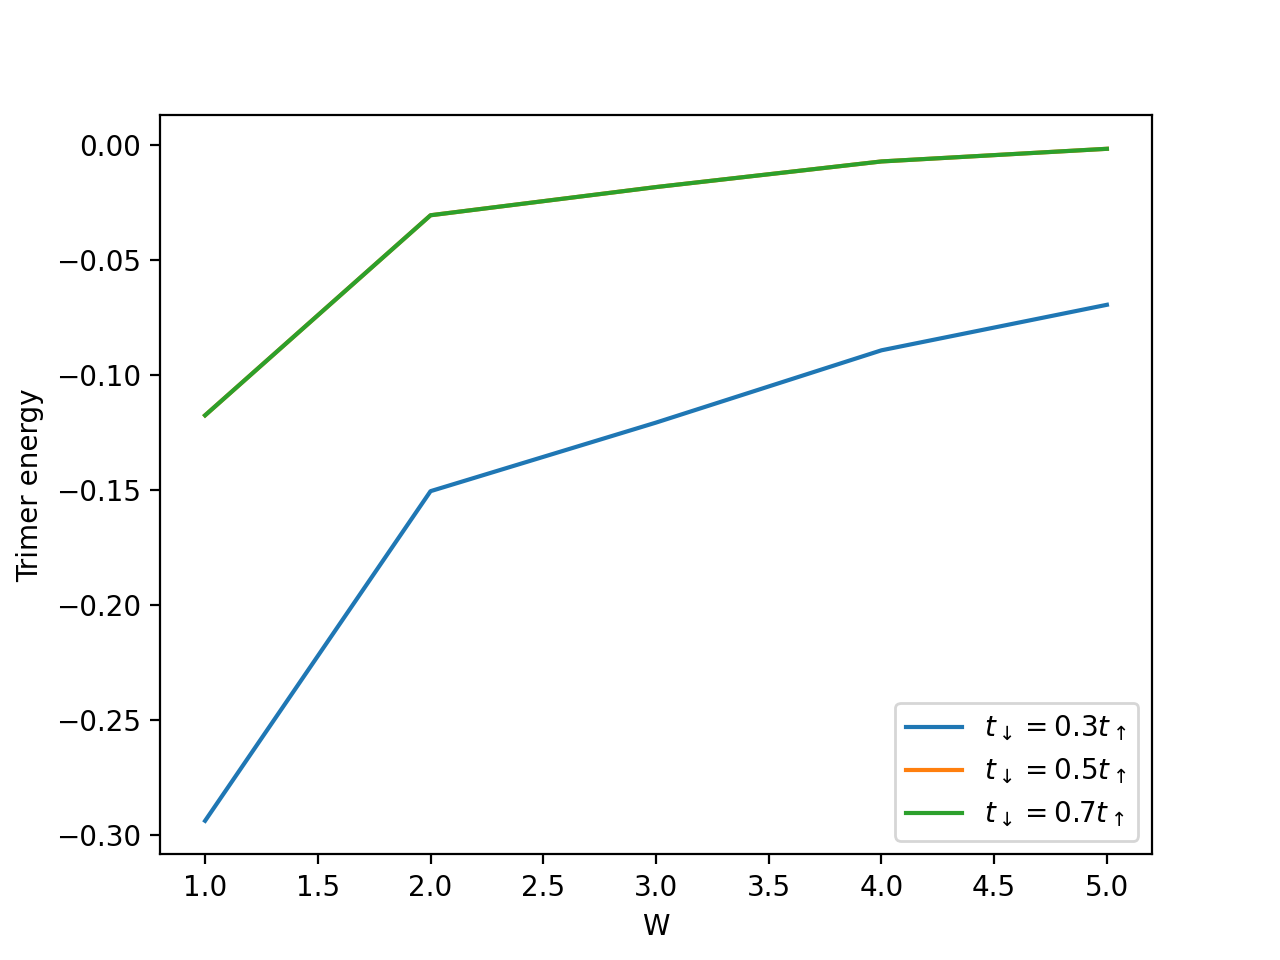

In [76]:
plt.plot(*get_w_dependence(files_list, 
                           masses = '03', 
                           lightweight = False
                          ),
        label = r'$t_{\downarrow} = 0.3t_{\uparrow}$')

plt.plot(*get_w_dependence(files_list, 
                           masses = '05', 
                           lightweight = False
                          ),
        label = r'$t_{\downarrow} = 0.5t_{\uparrow}$')
plt.plot(*get_w_dependence(files_list, 
                           masses = '05', 
                           lightweight = False
                          ),
        label = r'$t_{\downarrow} = 0.7t_{\uparrow}$')

plt.xlabel('W')
plt.ylabel('Trimer energy')
plt.legend()

# Trimer energy vs mass imbalance

<IPython.core.display.Javascript object>


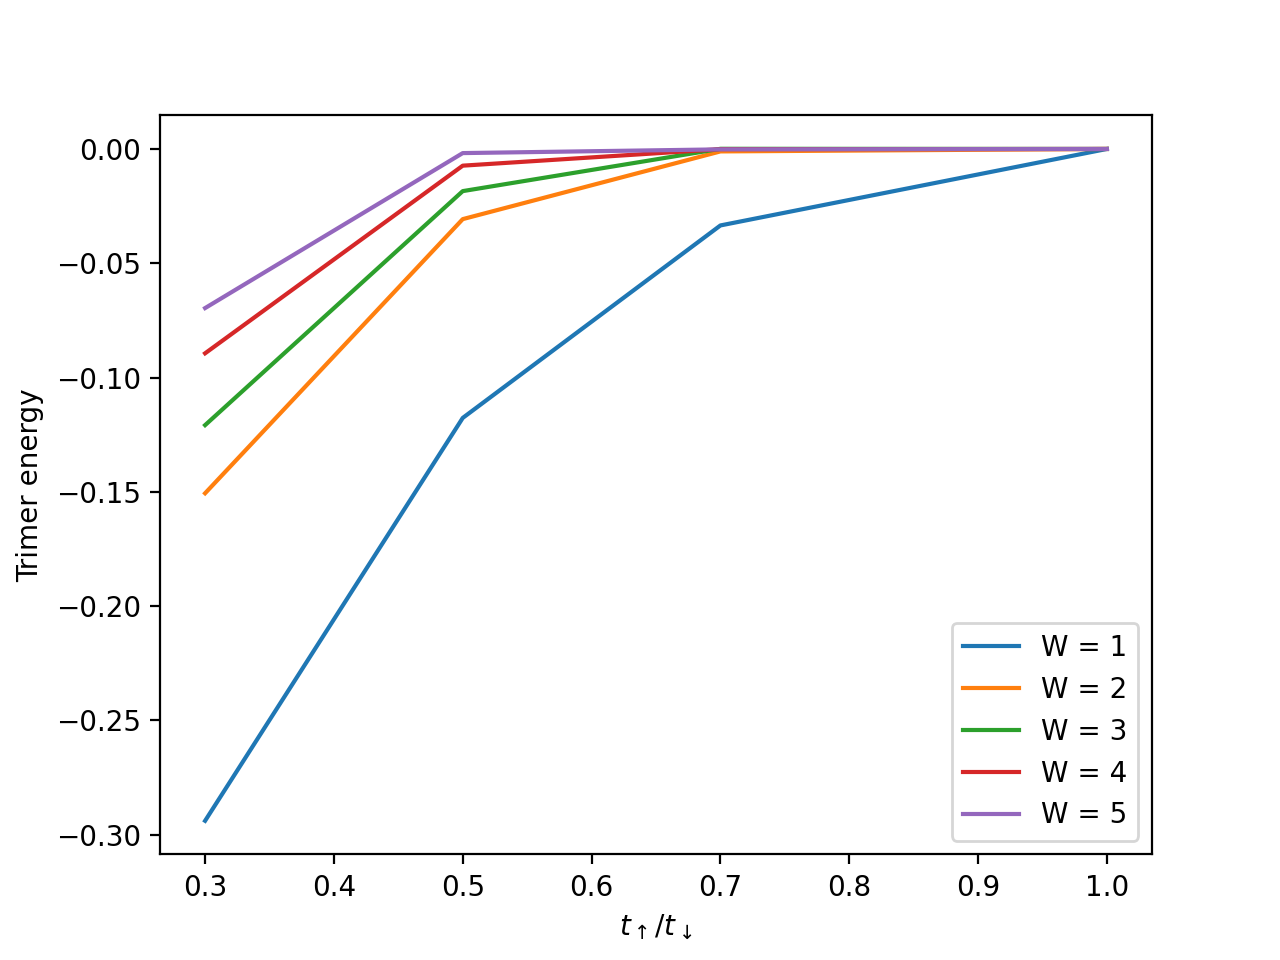

In [79]:
t03 = get_w_dependence(files_list, masses = '03', lightweight = False)[1]
t05 = get_w_dependence(files_list, masses = '05', lightweight = False)[1]
t07 = get_w_dependence(files_list, masses = '07', lightweight = False)[1]

w = [1,2,3,4,5]

for i in w:
    plt.plot([0.3, 0.5, 0.7, 1], 
             [t03[i-1], t05[i-1], t07[i-1], 0], label = 'W = '+ str(i))
    plt.xlabel(r'$t_{\uparrow}/t_{\downarrow}$')
    plt.ylabel('Trimer energy')
    plt.legend()